

<hr size="4" color="blue">

<p style="text-align: center;"><span style="color: #0000ff;"><font size="+5"><strong> Analyse en composantes principales
     </strong> </font></span> </p>
<hr style="height: 3px; color: #0000ff; width: 50%; border: 1px dashed #000;">

Ici nous présentons l’utilisation des fonctionnalités de Scikit-learn concernant l’ACP.  
Nous rappelons que le but de cette formation est l'apprentissage de l'outil python ici pour l'analyse statistique de données et non la compréhension de la méthode...  


Après une brève présentation de la classe correspondante de Scikit-learn, nous examinons d’abord des données générées de façon contrôlée afin de mieux comprendre l’impact de la distribution des données sur les résultats de l’ACP. Un exemple introductif au projet  basés sur des données réelles, est réalisée.


Dans Scikit-learn, l’analyse en composantes principales (ACP) est mise en œuvre dans la classe sklearn.decomposition.PCA (voir http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Les variantes et quelques exemples sont présentés sur http://scikit-learn.org/stable/modules/decomposition.html.

Pour définir l’analyse on appelle  

<div style="border: 2px solid #FF3A37; padding: 3px; background-color: #FFC1C0; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">

***PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None).***
   

    
    

Les paramètres d’appel sont (pour des explications plus détaillées voir le lien ci-dessus) :

- **n_components**  : nombre de composantes à conserver (par défaut toutes, c’est à dire min(n_samples, n_features) où n_samples est le nombre de lignes de la matrice de données et n_features le nombre de colonnes).
- **copy** : si False, la matrice de données est écrasée par les données transformées (par défaut True).
- **whiten** : si True, les données transformées sont modifiées pour que les projections sur les axes principaux présentent une variance unitaire (par défaut False).
- **svd_solver** : solveur à employer parmi 'auto', 'full', 'arpack', 'randomized' (par défaut 'auto').
- **tol, iterated_power, random_state**: paramètres optionnels pour solveurs spécifiques.

Les attributs accessibles sont les suivants :

- **explained_variance_** : array [n_components] dans lequel on trouve les valeurs propres en ordre décroissant.
- **components_** : array [n_components, n_features] dans lequel chaque ligne correspond à un vecteur propre ; l’ordre est celui des valeurs propres.
- **explained_variance_ratio_** : array [n_components] avec les valeurs propres exprimées en pourcentage de la variance expliquée.
- **mean_** : array [n_features] contenant les moyennes des variables calculées lors de l’ACP.
- **n_components_** : nombre estimé de composantes.
- **noise_variance_** : variance du bruit estimée suivant l’approche de l’ACP probabiliste (voir lien ci-dessus).  

Les méthodes qui peuvent être employées :

- **fit(X[, y])** : trouver les axes principaux et les valeurs propres associés à partir de la matrice de données X.
- **fit_transform(X[, y])**: trouver les axes principaux et les valeurs propres associés, appliquer la projection sur les axes principaux (avec stockage des résultats dans la matrice de données X si copy=False et dans une autre matrice si copy=True).
- **get_covariance()** : calculer les covariances à partir de la matrice de données.
- **get_params([deep])** : retourner les paramètres de l’estimateur.
- **get_precision()** : calculer la matrice de précision des données.
- **inverse_transform(X[, y])** : re-projeter les données transformées dans l’espace initial.
- **score(X[, y])** : valeur moyenne de la log-vraisemblance pour toutes les observations.
- **score_samples(X)** : log-vraisemblance pour chaque observation.
- **set_params(params)** : donner des valeurs aux paramètres de l’estimateur.
- **atransform(X[, y])** : appliquer la projection sur les axes principaux (avec stockage des résultats dans la matrice de données X si copy=False et dans une autre matrice si copy=True).


##  <span style="color: #0000ff;"><font size="+2"><strong> 1. Exemple ACP de données générées </strong> </font> </span>

In [1]:
import sklearn

Démarrez par la génération d’un ensemble de 500 vecteurs dans l’espace 3D, suivant une loi normale (de moyenne nulle et de variance unitaire), 

In [2]:
import numpy as np 
rndn3d = np.random.randn(500,3)

ensuite visualisez les points générés :

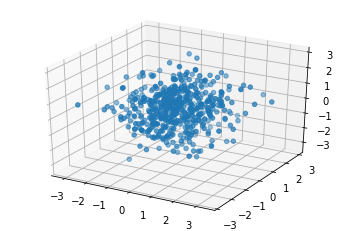

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndn3d[:,0],rndn3d[:,1],rndn3d[:,2])
plt.show()

Appliquez ensuite l’ACP à ces données :

In [7]:
import sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=3,copy=True,whiten=False)
pca.fit(rndn3d)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.explained_variance_ratio_

array([0.37228454, 0.3277871 , 0.29992836])

In [9]:
pca.components_

array([[-0.74104129,  0.02328982, -0.67105543],
       [ 0.65021948, -0.22448822, -0.72582345],
       [ 0.16754834,  0.97419845, -0.15121154]])

Chaque ligne de <font size="+1"> <span style="background:#E7E7E7;text-decoration: underline;"><strong>  pca.components_ </strong></span></font>  représente le vecteur unitaire qui donne la direction d’un axe factoriel. Le vecteur pca.components_[i,:] correspond à la valeur propre pca.explained_variance_ratio_[i].

On constate que chaque exécution les trois valeurs propres sont chaque fois très proches entre elles, ce qui indique que le nuage d’observations a une forme relativement sphérique. Ensuite, en examinant les vecteurs propres correspondants, on constate que d’un ensemble de données générées à un autre les directions des vecteurs propres changent, donc ces vecteurs n’ont pas de pertinence particulière pour décrire les données. Ce qui est cohérent avec les faibles différences entre valeurs propres successives.

Appliquez maintenant une déformation et une rotation dans l’espace tridimensionnel au nuage des observations de rndn3d, visualisez le résultat :

In [10]:
s1 = np.array([[3,0,0],[0,1,0],[0,0,0.2]])  # matrice de déformation
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]])  # matrice de rotation
rndef = rndn3d.dot(s1).dot(r1)

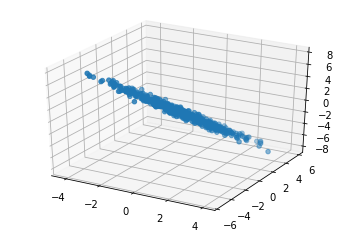

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:,0],rndef[:,1],rndef[:,2])
plt.show()

Appliquez une ACP à ces observations :

In [ ]:
pca = PCA(n_components=3)
pca.fit(rndef)
PCA(copy=True, n_components=3, whiten=False)

In [13]:
pca.explained_variance_ratio_

array([0.90940471, 0.08662029, 0.00397501])

In [14]:
pca.components_

array([[ 0.3665352 ,  0.47942886, -0.79737063],
       [-0.79671776,  0.60434477, -0.00286538],
       [-0.48051302, -0.6363296 , -0.60348312]])

Que constatez-vous par rapport à l’application directe de l’ACP sur les données de rndn3d ? Expliquez. Peut-on lier les rapports entre les valeurs propres obtenues aux rapports entre les éléments de la diagonale de la matrice de déformation s1 ?

Correction :
On constate ici que la décroissance des valeurs propres est ici très rapide, le premier axe factoriel explique 90% de la variance. Les rapports entre valeurs propres correspondent aux carrés des rapports entre les éléments de la diagonale de la matrice de déformation. En effet, les valeurs propres sont des variances alors que les éléments de la diagonale de la matrice de déformation ont ici une signification d’écart-types.


Si l'on génére un autre ensemble de données en utilisant les mêmes matrices de transformation on constate que les valeurs propres obtenues sur le second ensemble de données sont très proches de celles obtenues sur rndef. De plus, entre les deux ensembles de données, les vecteurs propres correspondant aux valeurs propres de même ordre sont très similaires. Les valeurs et vecteurs propres caractérisent les (fortes) déformations appliquées aux nuages d’observations générés et sont donc relativement stables par rapport à un changement d’échantillon.


##  <span style="color: #0000ff;"><font size="+2"><strong> 2. ACP sur des données réelles (projet) </strong> </font> </span>


### <span style="color: #0000ff;"><font size="+1"><strong> 2.1 Exemple sur le sommeil de mammifère ACP sur des données réelles (projet) </strong> </font> </span>


L’ACP sera d’abord appliquée aux données concernant le sommeil des mammifères. Il est d’abord nécessaire d’uploader ces données dans le répertoire de travail à partir du nuage se trouvant dans le dossier de partage du nuage.

Vous pouvez examiner le contenu de ce fichier format .csv.  
Les données doivent être ensuite lues dans Python (sans Pandas !!!!) :

In [16]:
from io import StringIO
import numpy as np
mammals = np.loadtxt('mammals.csv', delimiter=';', usecols=[1,2,3,4,5,6,7,8,9,10], skiprows=1)
mammals[:2,:]

array([[6.654e+03, 5.712e+03, 8.350e+00, 1.800e+00, 3.300e+00, 3.860e+01,
        6.450e+02, 3.000e+00, 5.000e+00, 3.000e+00],
       [1.000e+00, 6.600e+00, 6.300e+00, 2.000e+00, 8.300e+00, 4.500e+00,
        4.200e+01, 3.000e+00, 1.000e+00, 3.000e+00]])

In [17]:
noms = np.genfromtxt('mammals.csv', dtype='str', delimiter=';', usecols=[0], skip_header=1)
noms

array(['African elephant  ', 'African giant pouched rat', 'Arctic Fox  ',
       'Arctic ground squirrel ', 'Asian elephant  ', 'Baboon   ',
       'Big brown bat ', 'Brazilian tapir  ', 'Cat   ', 'Chimpanzee   ',
       'Chinchilla   ', 'Cow   ', 'Desert hedgehog  ', 'Donkey   ',
       'Eastern American mole ', 'Echidna   ', 'European hedgehog  ',
       'Galago   ', 'Genet   ', 'Giant armadillo  ', 'Giraffe   ',
       'Goat   ', 'Golden hamster  ', 'Gorilla   ', 'Gray seal  ',
       'Gray wolf  ', 'Ground squirrel  ', 'Guinea pig  ', 'Horse   ',
       'Jaguar   ', 'Kangaroo   ', 'Lesser short-tailed shrew ',
       'Little brown bat ', 'Man   ', 'Mole rat  ', 'Mountain beaver  ',
       'Mouse   ', 'Musk shrew  ', 'N. American opossum ',
       'Nine-banded armadillo  ', 'Okapi   ', 'Owl monkey  ',
       'Patas monkey  ', 'Phanlanger   ', 'Pig   ', 'Rabbit   ',
       'Raccoon   ', 'Rat   ', 'Red fox  ', 'Rhesus monkey  ',
       'Rock hyrax (Hetero. b)', 'Rock hyrax (Procavia h

### Appliquez une ACP aux données de mammals et affichez les valeurs propres. Comparez les deux premières aux valeurs vues en cours. Que constatez-vous ? Pourquoi 

In [19]:
pca = PCA()
pca.fit(mammals)
PCA(copy=True, n_components=None, whiten=False)
pca.explained_variance_ratio_

array([9.61492649e-01, 3.35026815e-02, 4.90760735e-03, 8.11547630e-05,
       1.21589728e-05, 2.12907093e-06, 8.08341160e-07, 4.40101019e-07,
       3.18913491e-07, 5.23943276e-08])


D'après les résultats, la première valeur propre obtenue explique la quasi-totalité de la variance, 


alors que dans le cours elle expliquait moins de la moitié. L’ACP directe n’est pas une ACP normée, les variances des variables « poids » (du corps, du cerveau) sont comparativement très élevées par rapport aux variances des autres variables et dominent très largement dans la définition de la direction du premier axe factoriel. Pour avoir une analyse utile il faut centrer et réduire les variables.

Appliquez une transformation de centrage et réduction aux variables décrivant les données de mammals (regardez le centrage et la réduction des variables (« standardization ») avec scikit-learn) et conservez le résultat dans mammalsCR. Appliquez de nouveau l’ACP, de préférence en utilisant une nouvelle instance pcaCR pour conserver pca. Comment ont évolué les valeurs propres les plus grandes ? Affichez le graphique de décroissance des valeurs propres.

In [21]:
>>> from sklearn import preprocessing
>>> mammalsCR = preprocessing.scale(mammals)
>>> pcaCR = PCA()
>>> pcaCR.fit(mammalsCR)
PCA(copy=True, n_components=None, whiten=False)
>>> pcaCR.explained_variance_ratio_

array([0.48017524, 0.22078825, 0.12605711, 0.06488067, 0.04739057,
       0.02607844, 0.01797744, 0.00920976, 0.00501433, 0.00242818])

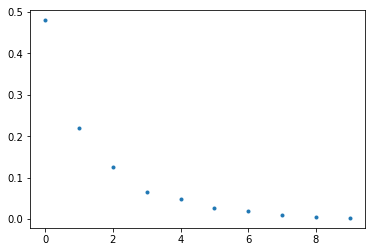

In [22]:
plt.plot(pcaCR.explained_variance_ratio_,'.')
plt.show()

La plus grande valeur propre a maintenant une valeur qui correspond au pourcentage vu en cours.

Nous pouvons maintenant obtenir et afficher les projections des observations sur les deux premiers axes factoriels. Rappelons que mammalsCR contient les données transformées (variables centrées et réduites) et que pcaCR est l’instance de PCA utilisée pour analyser mammalsCR ; mammalsCR et pcaCR ont été obtenues en réponse à la question ci-dessus.

In [24]:
mNt = pcaCR.transform(mammalsCR)
mNt[:2,:]

array([[ 6.50530263,  6.7330641 ,  3.43983054, -2.05458566, -1.38117895,
         0.06000125,  0.66178241,  0.31378774, -0.37607103, -0.30709013],
       [-0.42443283, -0.80647942, -0.41704187, -1.29587063,  0.09294702,
         0.39025445, -0.16477426,  0.09485348,  0.31128589, -0.1266842 ]])

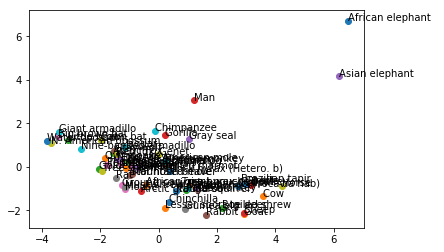

In [25]:
>>> fig = plt.figure()
>>> ax = fig.add_subplot(111)
>>> for i in range(len(noms)):
        x,y = mNt[i,0],mNt[i,1]
        ax.scatter(x,y)
        ax.text(x,y,noms[i])

>>> plt.show()


### Réalisez l’affichage des projections sur les 3 premiers axes principaux ; la possibilité de rotation du graphique facilite la lecture des étiquettes textuelles.


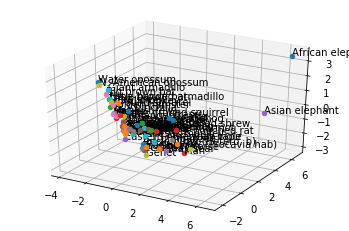

In [26]:
>>> fig = plt.figure()
>>> ax = fig.add_subplot(111, projection='3d')
>>> for i in range(len(noms)):
        x,y,z = mNt[i,0],mNt[i,1],mNt[i,2]
        ax.scatter(x,y,z)
        ax.text(x,y,z,noms[i])

>>> plt.show()

### Les résultats de l’analyse du nuage des variables ne sont pas directement disponibles. Comment pouvez-vous les obtenir ? Affichez la projection du nuage des variables sur les deux premiers axes factoriels.


Il suffit pour cela d’utiliser les relations de transition entre les deux analyses (voir le cours).

AttributeError: 'tuple' object has no attribute 'add_subplot'

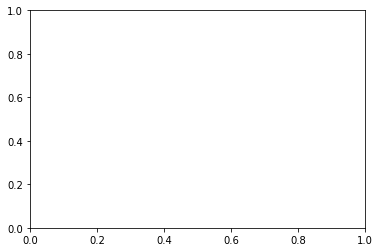

In [27]:
>>> mammalsCRTranspose = mammalsCR.transpose()
>>> irlambdas = 1/np.sqrt(pcaCR.explained_variance_)
>>> mirlambdas = np.diagflat(irlambdas)
>>> projectionsVars = (mammalsCRTranspose.dot(mNt)).dot(mirlambdas)/62
>>> nomsVars = np.genfromtxt('mammals.csv', dtype='str', delimiter=';', skip_header=0, max_rows=1)
>>> fig = plt.subplots()
>>> ax = fig.add_subplot(111)
>>> ax.set_autoscalex_on(False)
>>> ax.set_autoscaley_on(False)
>>> ax.set_xlim([-1, 1])
>>> ax.set_ylim([-1, 1])
>>> cercle = plt.Circle((0, 0), 1, color='b', fill=False)
>>> ax.add_artist(cercle)
>>> for i in range(len(nomsVars)-1):
        x,y = projectionsVars[i,0],projectionsVars[i,1]
        ax.scatter(x,y)
        ax.arrow(0, 0, x, y, shape='full', lw=1, length_includes_head=True)
        ax.text(x,y,nomsVars[i+1])

>>> plt.show() 


### <span style="color: #0000ff;"><font size="+1"><strong> 2.2 A toi de jouer Doris </strong> </font> </span>